<a href="https://colab.research.google.com/github/AiswaryaSuvetha/AiswaryaSuvetha/blob/main/Aiswarya_Suvetha_Learning_Lab_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Lab: Instagram Reach Analysis Using Python

Instagram is one of the most popular social media applications today. People using Instagram professionally are using it for promoting their business, building a portfolio, blogging, and creating various kinds of content. As Instagram is a popular application used by millions of people with different niches, Instagram keeps changing to make itself better for the content creators and the users. But as this keeps changing, it affects the reach of our posts that affects us in the long run. So if a content creator wants to do well on Instagram in the long run, they have to look at the data of their Instagram reach. That is where the use of Data Science in social media comes in. If you want to learn how to use our Instagram data for the task of Instagram reach analysis, this article is for you. In this article, I will take you through Instagram Reach Analysis using Python, which will help content creators to understand how to adapt to the changes in Instagram in the long run.

In [ ]:
# Run this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [ ]:
# Import data, run this cell
url = 'https://statso.io/wp-content/uploads/2022/10/archive.zip'
df = pd.read_csv(url, encoding = 'latin1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [ ]:
# TO DO: Check to see if there are any null values in the dataset
df.isnull().sum()


,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


In [ ]:
# TO DO: If there are null values, drop them
df = df.dropna()


In [ ]:
# TO DO: Here, check the data types of all of the columns
df.dtypes


,0
Impressions,int64
From Home,int64
From Hashtags,int64
From Explore,int64
From Other,int64
Saves,int64
Comments,int64
Shares,int64
Likes,int64
Profile Visits,int64


In [ ]:
# TO DO: Since we won't need the actual content of the captions or hashtags, let's drop those columns here, then display the new DataFrame.
df = df.drop(columns=['Caption', 'Hashtags'])
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
0,3920,2586,1028,619,56,98,9,5,162,35,2
1,5394,2727,1838,1174,78,194,7,14,224,48,10
2,4021,2085,1188,0,533,41,11,1,131,62,12
3,4528,2700,621,932,73,172,10,7,213,23,8
4,2518,1704,255,279,37,96,5,4,123,8,0


## Analyzing Instagram Reach
Now let’s start with analyzing the reach of my Instagram posts. I will first have a look at the distribution of impressions I have received from home:

<ipython-input-9-bda917f3f3d2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Home']) # creates a distplot using the 'From Home' column in our dataframe df


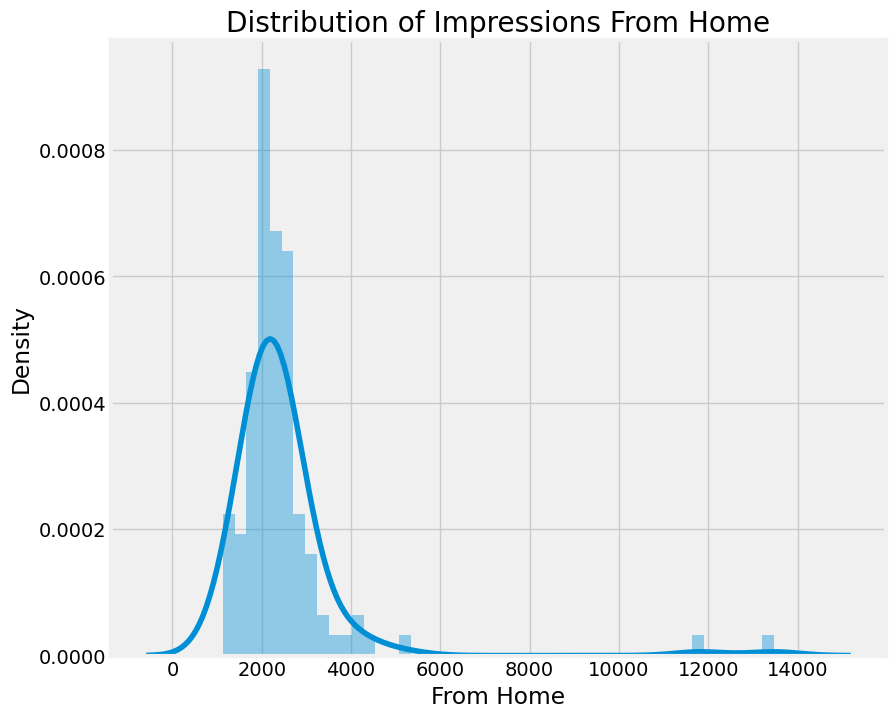

In [ ]:
# Run this cell
plt.figure(figsize=(10, 8)) # sets figure size
plt.style.use('fivethirtyeight') # customization based on the site FiveThirtyEight.com
plt.title("Distribution of Impressions From Home") # title of the visualization
sns.distplot(df['From Home']) # creates a distplot using the 'From Home' column in our dataframe df
plt.show()

The impressions I get from the home section on Instagram shows how much my posts reach my followers. Looking at the impressions from home, I can say it’s hard to reach all my followers daily. Now let’s have a look at the distribution of the impressions I received from hashtags:

<ipython-input-10-d38a2e89e8b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Hashtags'])


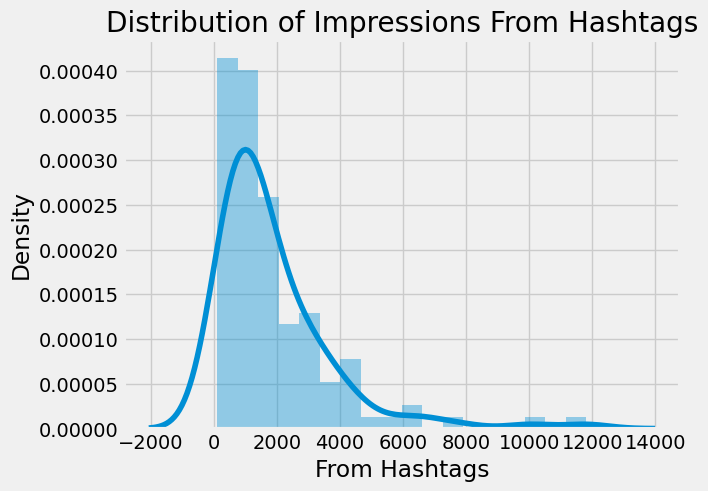

In [ ]:
# TO DO: Create a distplot similar to the one above, but looking at the impressions from hashtags instead of from home
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(df['From Hashtags'])
plt.show()



Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags. Now let’s have a look at the distribution of impressions I have received from the explore section of Instagram:

<ipython-input-11-6342387c334f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Explore'])


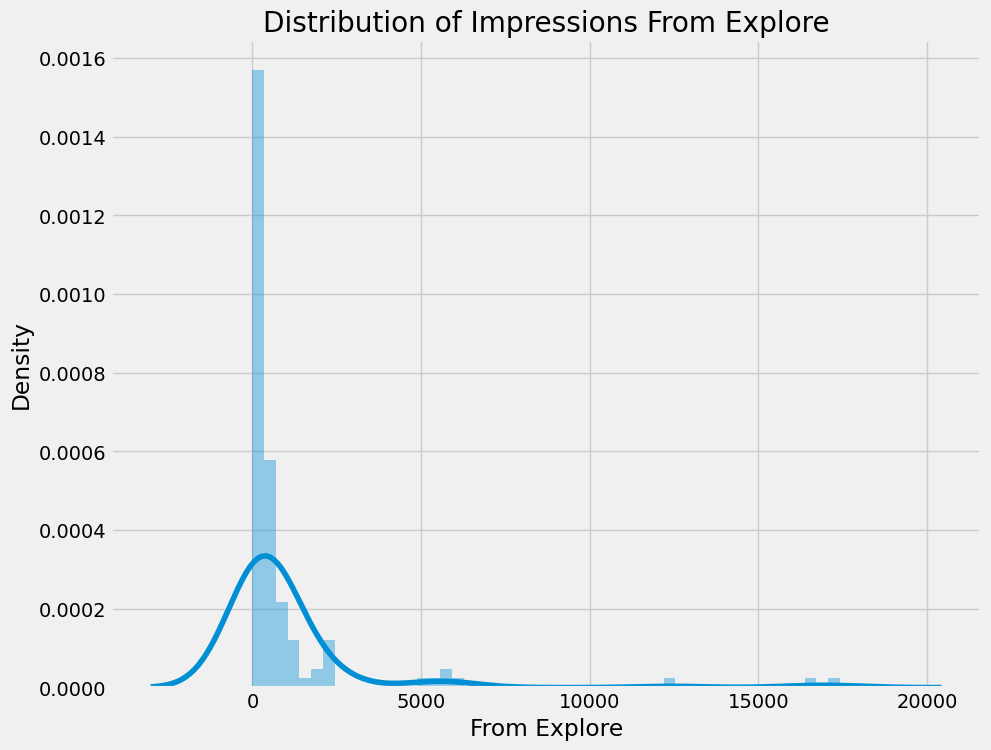

In [ ]:
# TO DO: Create a distplot looking at the impressions from the explore page
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Explore")
sns.distplot(df['From Explore'])
plt.show()

**TO DO:** The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions I have received from the explore section, I can say that Instagram **(does/does not)** recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very **(high/low)** compared to the reach I receive from hashtags.

Now let’s have a look at the percentage of impressions I get from various sources on Instagram:

In [ ]:
home = df['From Home'].sum()
hashtags = df['From Hashtags'].sum()
explore = df['From Explore'].sum()
other = df['From Other'].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

fig = px.pie(df, values=values, names=labels, title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

df2 = pd.read_csv(url,encoding='latin1')
df2.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


**TO DO**: So the above donut plot shows that almost 44.1% of the reach is from

---

my followers, 33.6% is from hashtags, 19.2% is from the explore section, and 3.05% is from other sources.

## Analyzing Content
Now let’s analyze the content of my Instagram posts. The dataset has two columns, namely caption and hashtags, which will help us understand the kind of content I post on Instagram.

Let’s create a wordcloud of the caption column to look at the most used words in the caption of my Instagram posts:

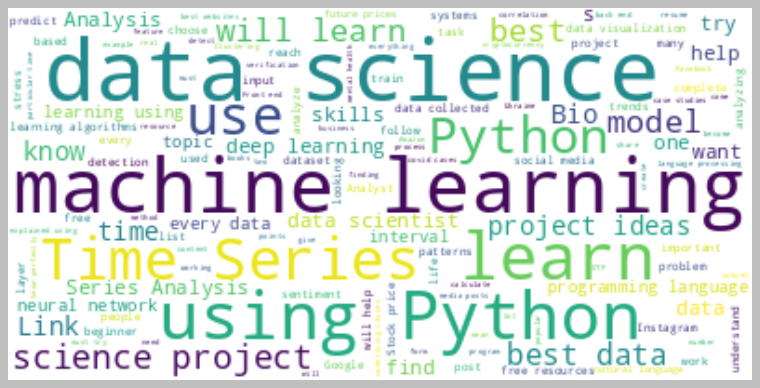

In [ ]:
# Run this cell
text = " ".join(i for i in df2.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts:

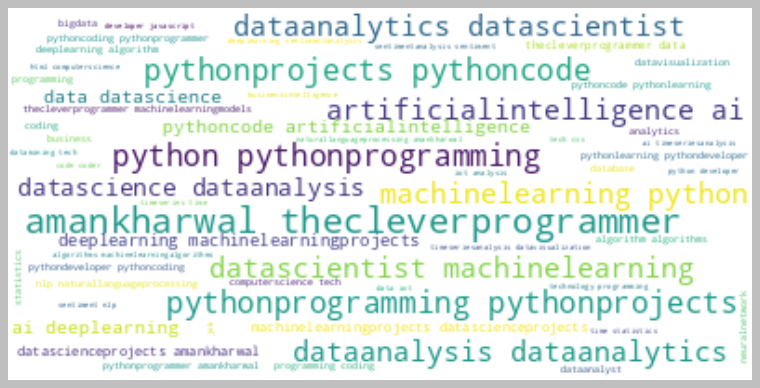

In [ ]:
# TO DO: Create a wordcloud using the hashtags column-- it should look very similar to the code in the cell above!
text = " ".join(i for i in df2.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Analyzing Relationships
Now let’s analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

Let’s have a look at the relationship between the number of likes and the number of impressions on my Instagram posts:

In [ ]:
# Run this cell
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()

There is a linear relationship between the number of likes and the reach I got on Instagram. Now let’s see the relationship between the number of comments and the number of impressions on my Instagram posts:

In [ ]:
# TO DO: Create a visualization similar to the one above that displays the relationship between the number of comments and the number of impressions
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Impressions")
figure.show()





**TO DO:** It looks like the number of comments we get on a post **(does not)** affect its reach. Now let’s have a look at the relationship between the number of shares and the number of impressions:

In [ ]:
# TO DO: Create a visualization similar to the one above that displays the relationship between the number of shares and the number of impressions:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Shares", size="Shares", trendline="ols",
                    title = "Relationship Between Shares and Impressions")
figure.show()





**TO DO**: A more number of shares will result in a **(higher)** reach, but shares **(don't)** affect the reach of a post as much as likes do. Now let’s have a look at the relationship between the number of saves and the number of impressions:

In [ ]:
# TO DO: Create a visualization similar to the one above that displays the relationship between the number of saves and the number of impressions:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Saves", size="Saves", trendline="ols",
                    title = "Relationship Between Saves and Impressions")
figure.show()




There is a linear relationship between the number of times my post is saved and the reach of my Instagram post. Now let’s have a look at the correlation of all the columns with the Impressions column:

In [ ]:
# Run this cell
# .corr() is a method from the Pandas library that calculates the correlation (linear relationship) between columns in a DataFrame
correlation = df.corr()
correlation["Impressions"].sort_values()

,Impressions
Comments,-0.028524
From Hashtags,0.560760
From Other,0.592960
Shares,0.634675
Profile Visits,0.760981
Saves,0.779231
From Home,0.844698
Likes,0.849835
Follows,0.889363
From Explore,0.893607


**TO DO:** So we can say that **(more)** likes and saves will help you get
**(more)** reach on Instagram. The higher number of shares will also get you **(more)** reach, but a low number of shares **(will not)** affect your reach either.

## Instagram Reach Prediction Model
Now in this section, I will train a machine learning model to predict the reach of an Instagram post. Let’s split the data into training and test sets before training the model:

In [ ]:
# TO DO: Assign the x and y for your predictive model
# test_size controls the proportion of the dataset assigned to the test set. in this example, setting test_size=0.2 means 20% of the data will be assigned to the test set, while 80% will be used for training.
# random_state allows us to split the data in a way that is reproducible, producing the same train/test split each time.
x = np.array(df[['Likes','Saves','Comments','Shares','Profile Visits','Follows']])
y = np.array(df['Impressions'])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Now here’s is how we can train a machine learning model to predict the reach of an Instagram post using Python:

In [ ]:
# TO DO: Fit and score your model
model = PassiveAggressiveRegressor() # a linear regression model from the scikit-learn library
model.fit(xtrain, ytrain)
model.score(xtest, ytest)


0.8642810180046203

Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model:

In [ ]:
# TO DO: Predict the reach of an Instagram post using the given features
# Features = [['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10772.5375435])